In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected= True)
import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff

In [4]:
veri = pd.read_csv("universite_siralamasi.csv")
veri.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [5]:
veri.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [6]:
veri.rename(columns = {'world_rank'             :  'dunya_siralama',
                       'university_name'        :  'uni_isim',
                       'country'                :  'ulke',
                       'teaching'               :  'ogretim',
                       'international'          :  'uluslararasi' ,
                       'research'               :  'arastirma',
                       'citations'              :  'alinti' ,
                       'income'                 :  'gelir',
                       'total_score'            :  'toplam_puan',
                       'num_students'           :  'ogrenci_sayisi',
                       'student_staff_ratio'    :  'ogrenci_calisan_orani',
                       'international_students' :  'uluslararasi_ogrenci' ,
                       'female_male_ratio'      :  'kadin_erkek_orani',
                       'year'                   :  'yil'}, inplace= True)
veri.head()

,dunya_siralama,uni_isim,ulke,ogretim,uluslararasi,arastirma,alinti,gelir,toplam_puan,ogrenci_sayisi,ogrenci_calisan_orani,uluslararasi_ogrenci,kadin_erkek_orani,yil
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [7]:
df = veri.iloc[:100,:]
df.head(3)

,dunya_siralama,uni_isim,ulke,ogretim,uluslararasi,arastirma,alinti,gelir,toplam_puan,ogrenci_sayisi,ogrenci_calisan_orani,uluslararasi_ogrenci,kadin_erkek_orani,yil
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011


In [11]:
#  Plotly stilleri
pio.templates.default = 'simple_white'

In [15]:
cizgi1 = go.Scatter(x = df.dunya_siralama,
                    y = df.alinti,
                    mode = "markers",
                    name = "Alıntı",
                    marker = dict(color='rgba(78,78,250,0.85)'),
                    text = df.uni_isim)

cizgi2 = go.Scatter(x = df.dunya_siralama,
                    y = df.ogretim,
                    mode = "markers",
                    name = "Eğitim-Öğretim Faaliyetleri",
                    marker = dict(color='rgba(202,43,15,0.85)'),
                    text = df.uni_isim)
veri = [cizgi1,cizgi2]
yerlesim = dict(title = 'Dünya Sıralamasında İlk 100 Üniversitenin Atıf ve Eğitim Öğretim Puanları',
                xaxis = dict(title= 'Dünya Sıralaması', ticklen= 5, zeroline = False))
fig = dict(data = veri, layout = yerlesim)
plot (fig, filename = '1_cizgi-alıntı ve öğretim puanları.html')


'1_cizgi-alıntı ve öğretim puanları.html'

In [26]:
# Çubuk Grafiği
veri2011 = df[df.yil == 2011].iloc[:5,:]
cizgi1 = go.Bar(x = veri2011.uni_isim,
                    y = veri2011.alinti,
                    name = "Alıntı",
                    marker = dict(color='rgba(255,127,40,0.5)',
                    line = dict(color='rgb(0,0,0)',width =1.5)),
                    text = veri2011.ulke)

cizgi2 = go.Bar(x = veri2011.uni_isim,
                    y = veri2011.ogretim,
                    name = "Eğitim Öğretim Faaliyetleri",
                    marker = dict(color='rgba(64,10,128,0.5)',
                             line = dict(color='rgb(0,0,0)',width =1.5)),
                    text = veri2011.ulke)
veri_ = [cizgi1,cizgi2]
yerlesim = go.Layout(barmode ="group")
fig = go.Figure(data = veri_, layout = yerlesim)
plot (fig, filename = '2_çubuk-alıntı ve öğretim puanları.html')

'2_çubuk-alıntı ve öğretim puanları.html'

In [32]:
# Daire Grafiği
veri2011 = df[df.yil == 2011].iloc[:8,:]
dilim1 = veri2011.ogrenci_sayisi
dilim1_liste = [float(each.replace(',','.')) for each in veri2011.ogrenci_sayisi]
etiketler = veri2011.uni_isim

cizgi = go.Pie(labels = etiketler,
               values = dilim1_liste,
               hoverinfo = 'label+value+percent',
               textinfo= 'value+percent',
               textfont =dict(size = 8),
               rotation = 180,
               hole = 0.3,
               marker = dict(line=dict(color ='#000000', width =1)))


veri_= [cizgi]
yerlesim = dict(title= '2011 Yılı- İlk 8 Üniversite Öğrenci Sayıları ve Oranları',
               legend = dict(orientation = 'h'))

fig = dict(data = veri_, layout = yerlesim)
plot(fig, filename = '3_dairesel- öğrenci sayısı.html')

'3_dairesel- öğrenci sayısı.html'

In [ ]:
#  Kabarcık Grafiği
veri2011 = df[df.yil == 2011].iloc[:20,:]
ogrenci_sayisi = [float(each.replace(',','.')) for each in veri2011.ogrenci_sayisi]
uluslararasi_renk = [float(each) for each in veri2011.uluslararasi]
data = [{'y': veri2011.ogretim,
        'x': veri2011.dunya_siralama,
        'mode': 'markers',
        'marker': {'color':uluslararasi_renk,
                  'size': ogrenci_sayisi,
                  'showscale': True},
        'text': veri2011.uni_isim}]
plot(data, filename = '4_kabarcık-öğrenci sayısı.html')

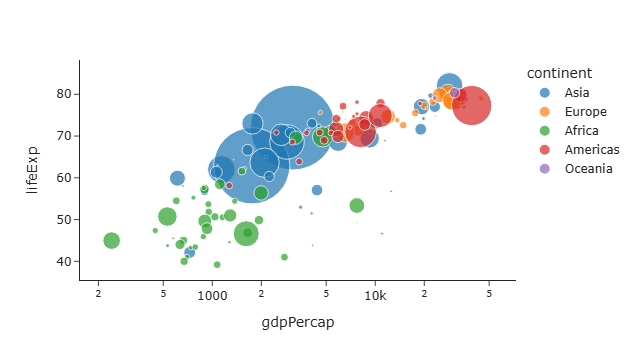

In [38]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year == 2002"), x = "gdpPercap",y ="lifeExp",
                size = "pop",color = "continent",
                hover_name = "country", log_x = True, size_max = 60)
fig.show()

In [39]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [42]:
df.describe(include = "all")

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
count,1704,1704,1704.00000,1704.000000,1.704000e+03,1704.000000,1704,1704.000000
unique,142,5,NaN,NaN,NaN,NaN,141,NaN
top,Afghanistan,Africa,NaN,NaN,NaN,NaN,KOR,NaN
freq,12,624,NaN,NaN,NaN,NaN,24,NaN
mean,NaN,NaN,1979.50000,59.474439,2.960121e+07,7215.327081,NaN,425.880282
std,NaN,NaN,17.26533,12.917107,1.061579e+08,9857.454543,NaN,248.305709
min,NaN,NaN,1952.00000,23.599000,6.001100e+04,241.165876,NaN,4.000000
25%,NaN,NaN,1965.75000,48.198000,2.793664e+06,1202.060309,NaN,208.000000
50%,NaN,NaN,1979.50000,60.712500,7.023596e+06,3531.846989,NaN,410.000000
75%,NaN,NaN,1993.25000,70.845500,1.958522e+07,9325.462346,NaN,638.000000
